In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


tech = pd.read_csv('/Users/Jonat/Downloads/tech_companies_salary.csv')

pd.set_option('display.max_columns', None)

tech.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

In [ ]:
tech.shape

(62642, 29)

In [ ]:
tech.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [ ]:
def update_race(row):
    if row['Race_Asian'] == 1:
        return 'Asian'
    elif row['Race_Black'] == 1:
        return 'Black'
    elif row['Race_Hispanic'] == 1:
        return 'Hispanic'
    elif row['Race_White'] == 1:
        return 'White'
    elif row['Race_Two_Or_More'] == 1:
        return 'Mixed Race'
    else:
        return np.nan


def update_education(row):
    if row['Doctorate_Degree'] == 1:
        return 'Doctorate'
    elif row['Masters_Degree'] == 1:
        return 'Masters'
    elif row['Bachelors_Degree'] == 1:
        return 'Bachelors'
    elif row['Highschool'] == 1:
        return 'High School'
    elif row['Some_College'] == 1:
        return 'Some College'
    else:
        return np.nan

tech['Race'] = tech.apply(update_race, axis=1)

tech['Education'] = tech.apply(update_education, axis=1)

columns_to_drop = ['Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White', 'Race_Two_Or_More',
                   'Doctorate_Degree', 'Masters_Degree', 'Bachelors_Degree', 'Highschool','Some_College']
tech.drop(columns=columns_to_drop, inplace=True)


tech

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,NaN,NaN,7392,807.0,1,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7419,807.0,2,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,NaN,NaN,11527,819.0,3,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,NaN,NaN,7472,807.0,7,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7322,807.0,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,150000.0,22000.0,NaN,NaN,11527,819.0,1973,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,73200.0,16000.0,NaN,NaN,11521,819.0,2037,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,25000.0,20000.0,NaN,NaN,11527,819.0,2044,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,57000.0,29000.0,NaN,NaN,7419,807.0,2097,NaN,NaN


In [ ]:
tech.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Race', 'Education'],
      dtype='object')

In [ ]:
tech['totalyearlycompensation'].value_counts(dropna = True)
tech['Race'].value_counts(dropna = True)
tech['Education'].value_counts(dropna = True)
tech['basesalary'].value_counts(dropna = False)
tech['gender'].value_counts(dropna = True)
tech['title'].value_counts(dropna = True)
tech.dropna(subset=['totalyearlycompensation','title', 'Race','Education', 'gender'], how='any', inplace=True)





In [ ]:
def extract_location_details(location):
    parts = [part.strip() for part in location.split(',')]
    city = parts[0] if len(parts) > 0 else None
    state = parts[1] if len(parts) > 1 and len(parts[1]) == 2 else None
    country = parts[-1] if len(parts) > 2 else ('USA' if state else None)
    return city, state, country

tech[['city', 'state', 'country']] = tech.apply(
    lambda row: extract_location_details(row['location']), axis=1, result_type="expand")

print(tech['country'].unique())
print(tech['state'].unique())
tech['city'].unique()


['USA' 'Canada' 'India' 'Netherlands' 'United Kingdom' 'Hong Kong (SAR)'
 'China' 'Ireland' 'Germany' 'Russia' 'Israel' 'Singapore'
 'Czech Republic' 'France' 'Japan' 'Switzerland' 'Poland' 'Brazil'
 'Australia' 'Spain' 'Ukraine' 'Italy' 'Romania' 'South Africa' 'Hungary'
 'Serbia' 'Portugal' 'Indonesia' 'Moldova' 'Taiwan' 'Malaysia'
 'United Arab Emirates' 'Sweden' 'New Zealand' 'Saudi Arabia' 'Argentina'
 'Peru' 'Philippines' 'Norway' 'Estonia' 'Belarus' 'Mexico' 'Austria'
 'South' 'Finland' 'Vietnam' 'Qatar' 'Luxembourg' 'Costa Rica' 'Colombia'
 'Slovakia' 'Denmark' 'Belgium' 'Latvia' 'Kenya' 'Thailand' 'Bulgaria'
 'Chile' 'Lithuania' 'Ghana' 'Kazakhstan' 'Nigeria' 'Uzbekistan' 'Armenia'
 'Egypt']
['CA' 'WA' 'TX' 'ON' 'BC' 'KA' 'NH' 'AZ' 'NY' 'IL' 'HR' 'AP' 'MH' 'MA'
 'NC' 'VA' 'CO' 'EN' 'FL' 'WI' 'HK' 'GD' 'DC' 'GY' 'OR' 'MI' 'MN' 'MO'
 'BE' 'MC' 'PA' 'TN' 'TA' 'SG' 'UT' 'NJ' 'DN' 'ZJ' 'KD' 'SP' 'BJ' 'PR'
 'LA' 'GA' 'TY' 'AR' 'TS' 'ZH' 'MZ' 'IA' 'BY' 'NS' 'OH' 'BW' 'MD' 'LK'
 'IN' 

array(['Sunnyvale', 'Redmond', 'San Bruno', 'Seattle', 'San Francisco',
       'Houston', 'Toronto', 'Vancouver', 'Bangalore', 'Amsterdam',
       'Tempe', 'Santa Clara', 'Menlo Park', 'Austin', 'New York',
       'San Jose', 'Chicago', 'Mountain View', 'Los Angeles', 'Gurgaon',
       'Hyderabad', 'Mumbai', 'Boston', 'Cupertino', 'Charlotte',
       'Ottawa', 'Arlington', 'Palo Alto', 'Claremont', 'Broomfield',
       'Bellevue', 'Bengaluru', 'Costa Mesa', 'Reston', 'London',
       'Littleton', 'Orlando', 'Redwood City', 'Madison', 'Hong Kong',
       'Guangzhou', 'Washington', 'Cambridge', 'Galway', 'Raleigh',
       'Dallas', 'San Diego', 'Texas City', 'Hillsboro', 'Sacramento',
       'Detroit', 'Minneapolis', 'Kansas City', 'Berlin', 'Durham',
       'Moscow', 'Denver', 'Philadelphia', 'Vienna', 'Chennai',
       'Portland', 'Shenzhen', 'Tel Aviv', 'Singapore', 'Hopkinton',
       'Lehi', 'Los Gatos', 'Newark', 'Natick', 'Dearborn', 'Richmond',
       'Nashville', 'Italy', 'Dubli

In [ ]:
tech[tech['country'] != 'USA']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education,city,state,country
23541,07-03-2020 22:51,Shopify,L6,Software Engineer,98000,"Toronto, ON, Canada",9.0,4.0,Web Development (Front-End),78000,20000.0,0.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",1206,0.0,32248,Asian,Bachelors,Toronto,ON,Canada
23543,07-03-2020 23:39,Apple,ICT3,Software Engineer,180000,"Vancouver, BC, Canada",1.0,1.0,ML / AI,130000,30000.0,20000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",1320,0.0,32250,Asian,Bachelors,Vancouver,BC,Canada
23546,07-04-2020 01:17,Salesforce,Senior MTS,Software Engineer,68000,"Bangalore, KA, India",8.0,1.0,Site Reliability (SRE),45000,16000.0,7000.0,Male,"Race: Asian, Academic Level: Master’s degree",4058,0.0,32254,Asian,Masters,Bangalore,KA,India
23547,07-04-2020 03:31,Adyen,NaN,Software Engineer,79000,"Amsterdam, NH, Netherlands",4.0,2.0,Distributed Systems (Back-End),78000,1000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",6580,0.0,32256,White,Bachelors,Amsterdam,NH,Netherlands
23564,07-04-2020 18:11,Google,L3,Software Engineer,46000,"Bangalore, KA, India",2.0,0.0,Distributed Systems (Back-End),27000,12000.0,4000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",4058,0.0,32280,Asian,Bachelors,Bangalore,KA,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61816,8/17/2021 1:45:21,Motional,L4,Software Engineer,144000,"Pasir Ris, SG, Singapore",5.0,2.0,ML / AI,114000,13000.0,17000.0,Male,"Title: Research Scientist, Race: White, Academ...",16802,0.0,83839,White,Doctorate,Pasir Ris,SG,Singapore
61817,8/17/2021 3:16:59,Amazon,L5,Software Engineer,179000,"Dublin, DN, Ireland",10.0,1.0,Site Reliability (SRE),113000,24000.0,42000.0,Male,"Health/Life insurance, Title: Systems Developm...",4015,0.0,83843,White,Masters,Dublin,DN,Ireland
61820,8/17/2021 4:18:38,Publicis Sapient,Manager,Software Engineering Manager,120000,"Frankfurt, HE, Germany",7.0,2.0,Full Stack,110000,0.0,10000.0,Male,"Title: Salesforce Architect, Race: White, Acad...",6419,0.0,83848,White,Masters,Frankfurt,HE,Germany
61823,8/17/2021 5:06:01,Microsoft,63,Software Engineer,87000,"Prague, PR, Czech Republic",10.0,4.0,Distributed Systems (Back-End),67000,13000.0,7000.0,Male,"Title: Senior Software Egineer, Race: White, A...",3643,0.0,83853,White,Masters,Prague,PR,Czech Republic


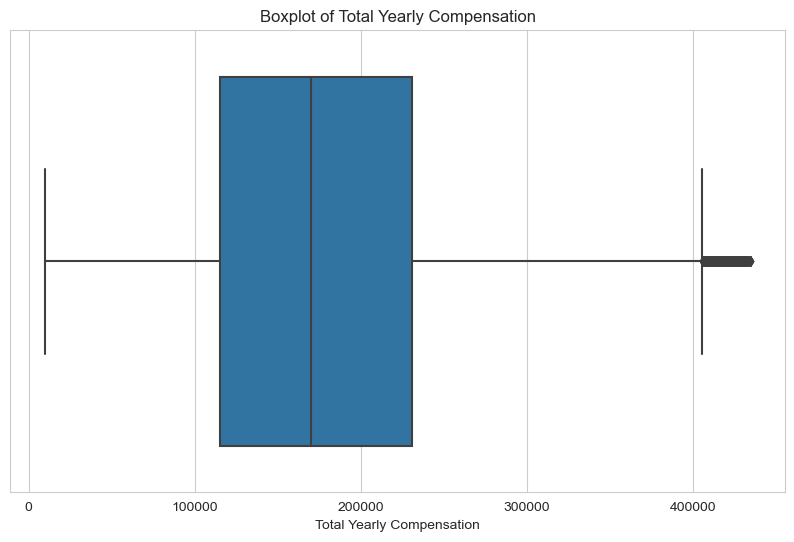

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=tech['totalyearlycompensation'])
plt.title('Boxplot of Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.show()


In [ ]:
Q1 = tech['totalyearlycompensation'].quantile(0.25)
Q3 = tech['totalyearlycompensation'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


tech = tech[(tech['totalyearlycompensation'] >= lower_bound) &
                     (tech['totalyearlycompensation'] <= upper_bound)]

tech


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education,city,state,country
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,1000.0,11000.0,Male,"Race: Two or More Races, Academic Level: Bache...",11521,819.0,32237,Mixed Race,Bachelors,Redmond,WA,USA
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,125000.0,36000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7413,807.0,32239,Asian,Bachelors,San Bruno,CA,USA
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,38000.0,20000.0,Male,"Race: Asian, Academic Level: Master’s degree",11527,819.0,32240,Asian,Masters,Seattle,WA,USA
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,22000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32241,White,Bachelors,San Francisco,CA,USA
23537,07-03-2020 20:24,Amazon,L6,Software Engineer,310000,"Seattle, WA",15.0,3.0,ML / AI,160000,150000.0,0.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",11527,819.0,32243,Asian,Bachelors,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61824,8/17/2021 5:38:26,ByteDance,01-Feb,Software Engineer,77000,"Raffles Park, SG, Singapore",0.0,0.0,Distributed Systems (Back-End),62000,0.0,15000.0,Male,"Title: Software Engineer (back-end), Race: Asi...",41795,0.0,83855,Asian,Bachelors,Raffles Park,SG,Singapore
61826,8/17/2021 6:47:07,NCR,10,Software Engineer,92000,"Atlanta, GA",2.0,2.0,Full Stack,92000,0.0,0.0,Male,"Title: Software Engineer Ii, Race: Asian, Acad...",7839,524.0,83861,Asian,Bachelors,Atlanta,GA,USA
61828,8/17/2021 7:50:25,Raytheon Technologies,P2,Software Engineer,95000,"Portsmouth, RI",3.0,3.0,Distributed Systems (Back-End),90000,0.0,5000.0,Male,"Title: Software Engineer Ii, Race: White, Acad...",35382,521.0,83865,White,Bachelors,Portsmouth,RI,USA
61830,8/17/2021 8:16:36,Amazon,L6,Product Manager,241000,"Seattle, WA",9.0,0.0,Analytic,150000,46000.0,45000.0,Female,"Title: Senior Product Manager, Race: Asian, Ac...",11527,819.0,83870,Asian,Bachelors,Seattle,WA,USA


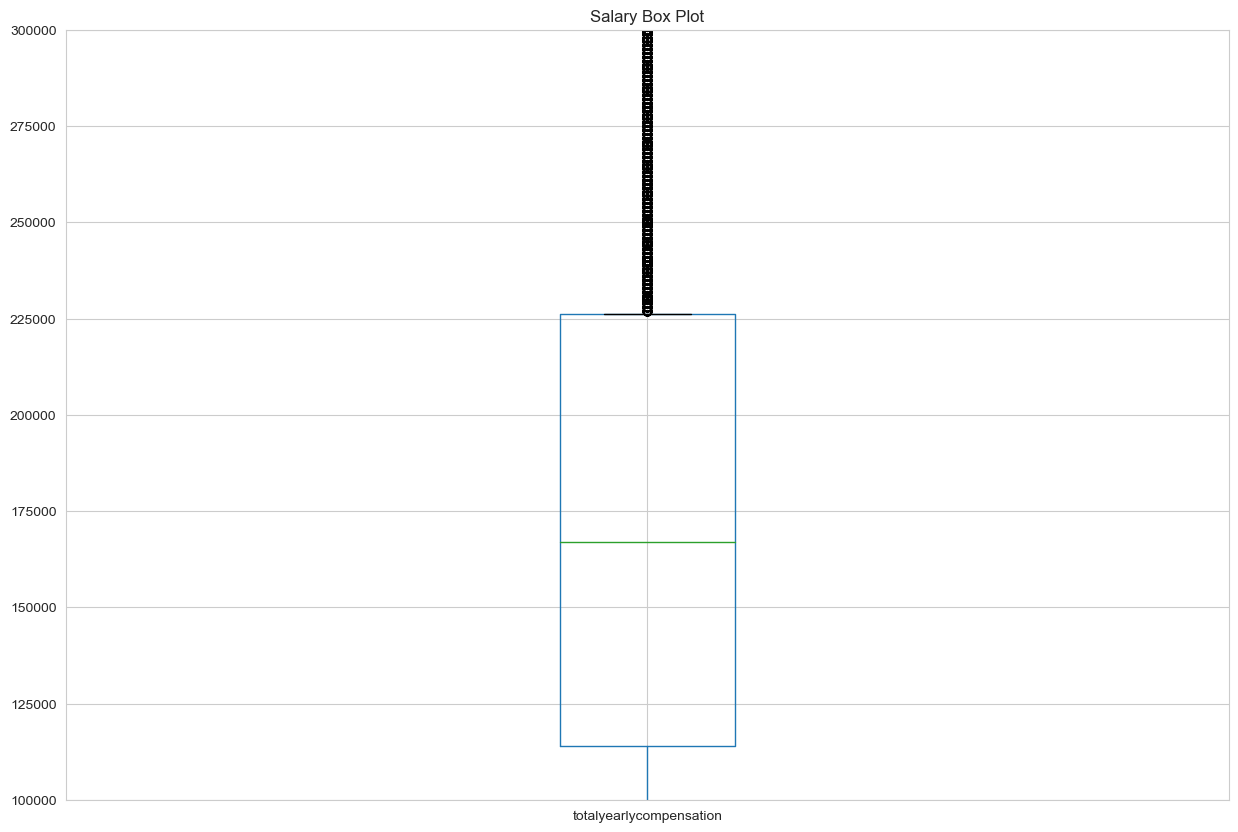

In [ ]:
plt.figure(figsize=(15, 10))


formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')
plt.gca().yaxis.set_major_formatter(formatter)

tech.boxplot(column=['totalyearlycompensation'], whis=[10, 50])
plt.title('Salary Box Plot')


plt.ylim(100000, 300000)

plt.show()

In [ ]:
se = tech[tech['title'] == 'Software Engineer']

se

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education,city,state,country
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,1000.0,11000.0,Male,"Race: Two or More Races, Academic Level: Bache...",11521,819.0,32237,Mixed Race,Bachelors,Redmond,WA,USA
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,125000.0,36000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7413,807.0,32239,Asian,Bachelors,San Bruno,CA,USA
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,38000.0,20000.0,Male,"Race: Asian, Academic Level: Master’s degree",11527,819.0,32240,Asian,Masters,Seattle,WA,USA
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,22000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32241,White,Bachelors,San Francisco,CA,USA
23537,07-03-2020 20:24,Amazon,L6,Software Engineer,310000,"Seattle, WA",15.0,3.0,ML / AI,160000,150000.0,0.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",11527,819.0,32243,Asian,Bachelors,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61822,8/17/2021 4:45:51,Capital One,Senior Associate,Software Engineer,127000,"West McLean, VA",2.0,0.0,Full Stack,122000,0.0,6000.0,Male,"Title: Software Engineer, Race: White, Academi...",40693,511.0,83851,White,Bachelors,West McLean,VA,USA
61823,8/17/2021 5:06:01,Microsoft,63,Software Engineer,87000,"Prague, PR, Czech Republic",10.0,4.0,Distributed Systems (Back-End),67000,13000.0,7000.0,Male,"Title: Senior Software Egineer, Race: White, A...",3643,0.0,83853,White,Masters,Prague,PR,Czech Republic
61824,8/17/2021 5:38:26,ByteDance,01-Feb,Software Engineer,77000,"Raffles Park, SG, Singapore",0.0,0.0,Distributed Systems (Back-End),62000,0.0,15000.0,Male,"Title: Software Engineer (back-end), Race: Asi...",41795,0.0,83855,Asian,Bachelors,Raffles Park,SG,Singapore
61826,8/17/2021 6:47:07,NCR,10,Software Engineer,92000,"Atlanta, GA",2.0,2.0,Full Stack,92000,0.0,0.0,Male,"Title: Software Engineer Ii, Race: Asian, Acad...",7839,524.0,83861,Asian,Bachelors,Atlanta,GA,USA


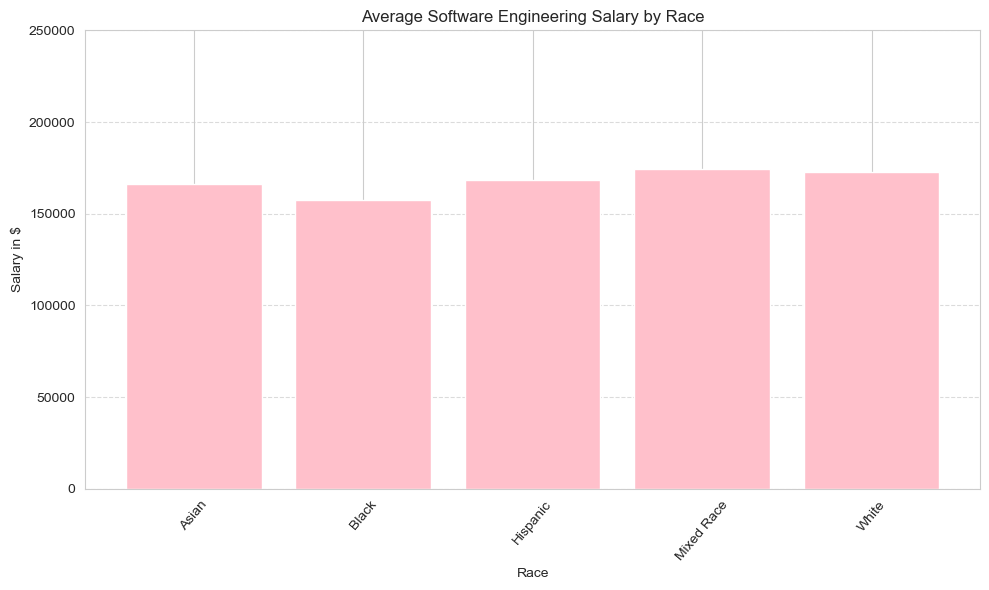

In [ ]:

average_salary_by_race = se.groupby('Race')['totalyearlycompensation'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(average_salary_by_race['Race'], average_salary_by_race['totalyearlycompensation'], color='pink')
plt.xlabel('Race')
plt.ylabel('Salary in $')
plt.title('Average Software Engineering Salary by Race')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,250000)
plt.tight_layout()
plt.show()

In [ ]:
se.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Race', 'Education', 'city', 'state', 'country'],
      dtype='object')

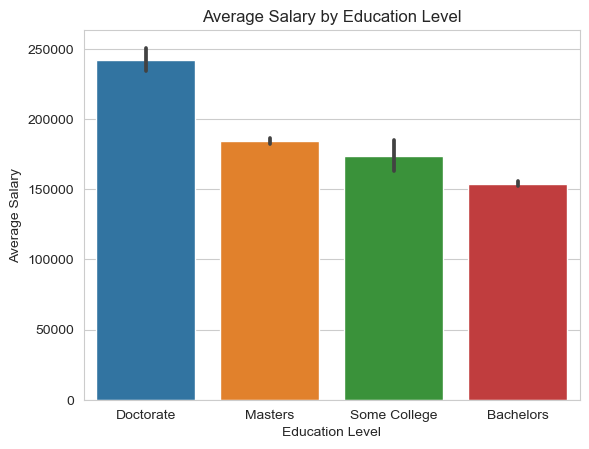

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filtered_data = se[se['Education'] != 'High School']


sns.barplot(x='Education', y='totalyearlycompensation', data=filtered_data, estimator=np.mean,
            order=filtered_data.groupby('Education')['totalyearlycompensation'].median().sort_values(ascending=False).index)

plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=0)
plt.show()


In [ ]:
tech['Education'].unique()

array(['Bachelors', 'Masters', 'Some College', 'High School', 'Doctorate'],
      dtype=object)

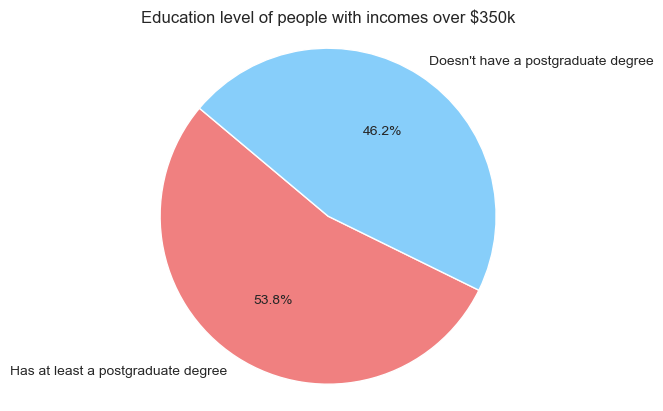

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

high_income = se[se['totalyearlycompensation'] > 300000]


did_schooling = high_income[high_income['Education'].isin(['Doctorate', 'Masters'])]


people_with_degree = did_schooling['Education'].notna()

people_without_degree = high_income.shape[0] - did_schooling.shape[0]


labels = ['Has at least a postgraduate degree', "Doesn't have a postgraduate degree"]
sizes = [did_schooling.shape[0], people_without_degree]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Education level of people with incomes over $350k')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


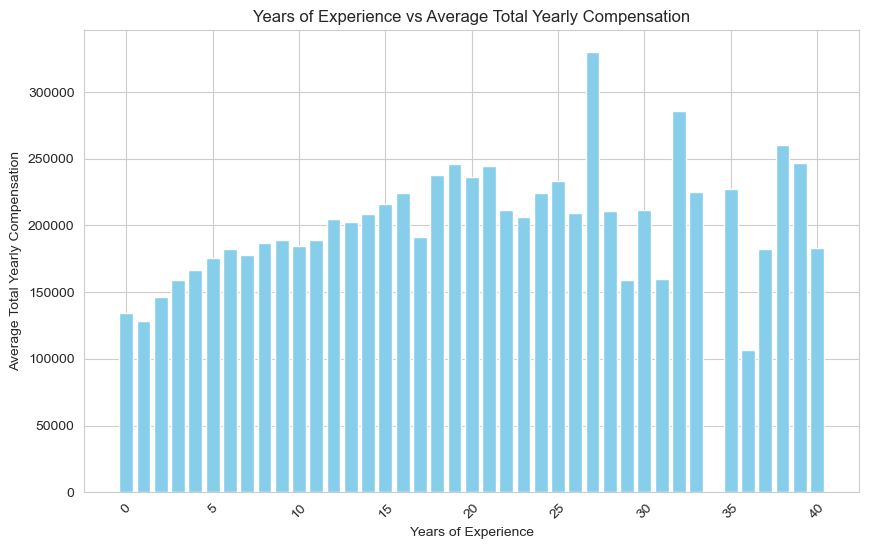

In [ ]:

salary_by_years_of_experience = se.groupby('yearsofexperience')['totalyearlycompensation'].mean()



plt.figure(figsize=(10, 6))
plt.bar(salary_by_years_of_experience.index, salary_by_years_of_experience.values, color='skyblue')



plt.xlabel('Years of Experience')
plt.ylabel('Average Total Yearly Compensation')
plt.title('Years of Experience vs Average Total Yearly Compensation')


plt.xticks(rotation=45)
plt.show()



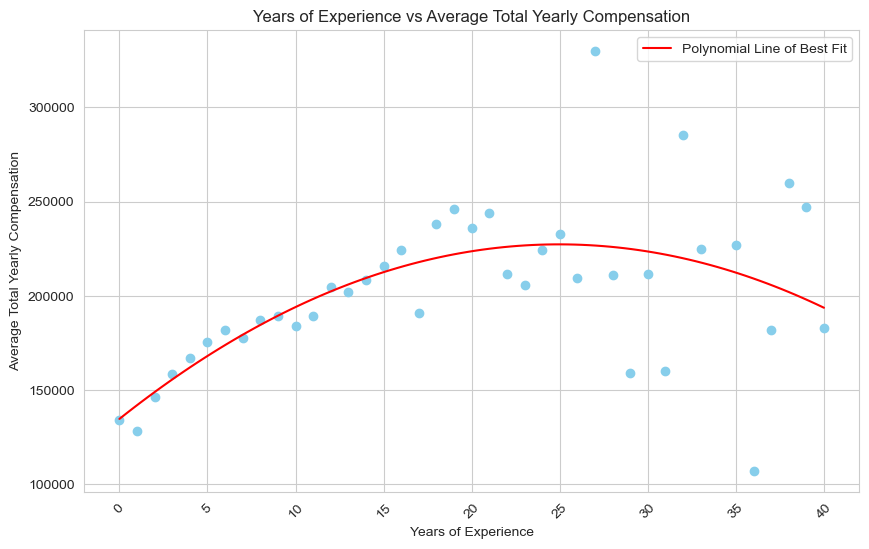

In [ ]:
degree = 2
coefficients = np.polyfit(salary_by_years_of_experience.index, salary_by_years_of_experience.values, degree)
polynomial = np.poly1d(coefficients)


x = np.linspace(salary_by_years_of_experience.index.min(), salary_by_years_of_experience.index.max(), 100)
y_poly = polynomial(x)

plt.figure(figsize=(10, 6))
plt.scatter(salary_by_years_of_experience.index, salary_by_years_of_experience.values, color='skyblue')
plt.plot(x, y_poly, color='red', label='Polynomial Line of Best Fit')

plt.xlabel('Years of Experience')
plt.ylabel('Average Total Yearly Compensation')
plt.title('Years of Experience vs Average Total Yearly Compensation')
plt.xticks(rotation=45)
plt.legend()
plt.show()


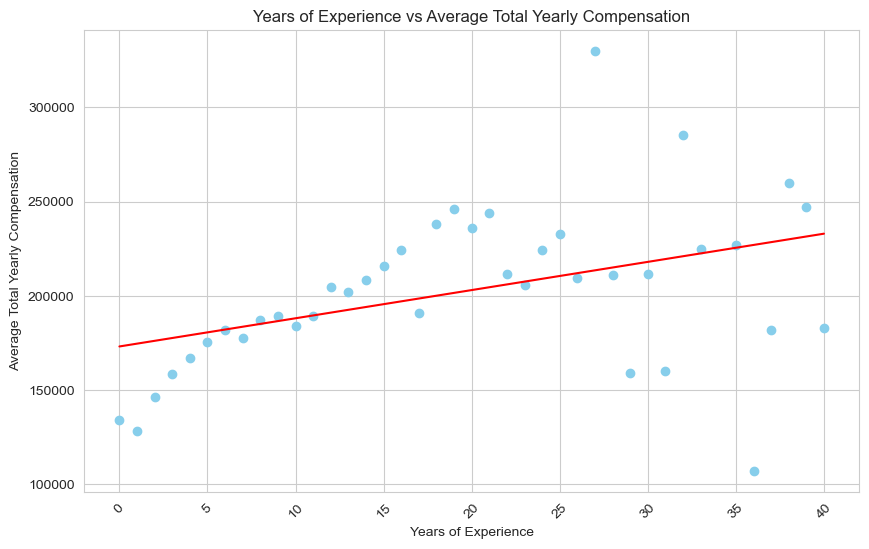

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(salary_by_years_of_experience.index, salary_by_years_of_experience.values, color='skyblue')


plt.xlabel('Years of Experience')
plt.ylabel('Average Total Yearly Compensation')
plt.title('Years of Experience vs Average Total Yearly Compensation')

slope, intercept = np.polyfit(salary_by_years_of_experience.index, salary_by_years_of_experience.values, 1)

x = np.array([salary_by_years_of_experience.index.min(), salary_by_years_of_experience.index.max()])
y = slope * x + intercept
plt.plot(x, y, color='red', label='Line of Best Fit')
plt.xticks(rotation=45)
plt.show()


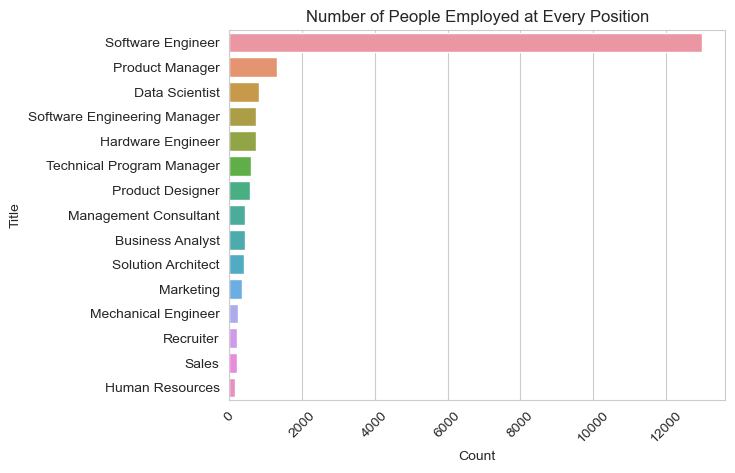

In [ ]:
sns.countplot(y='title', data=tech, order = tech['title'].value_counts().index)

plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Number of People Employed at Every Position')
plt.xticks(rotation=45)
plt.show()

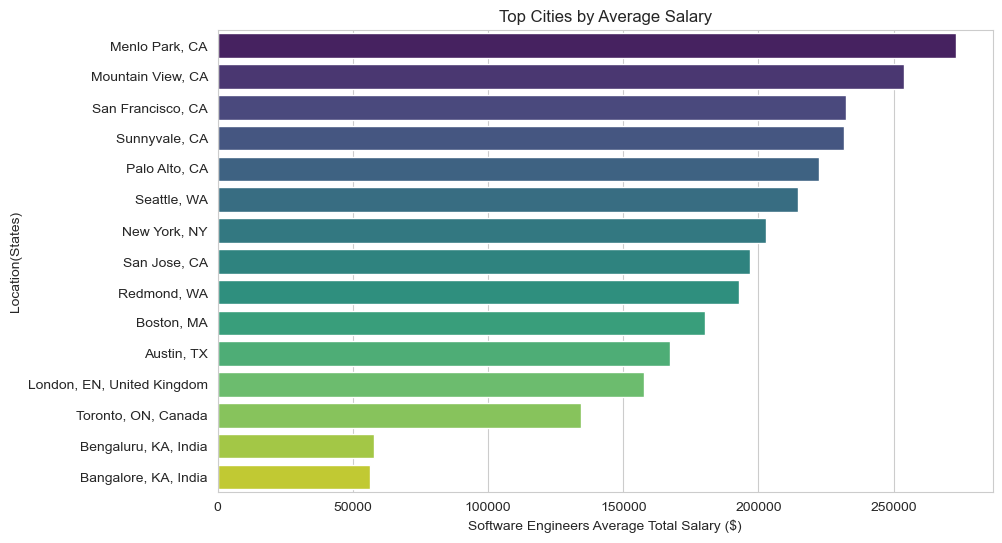

In [ ]:

populated_locations = se['location'].value_counts().head(15).index

populated_locations


top_locations = se[se['location'].isin(populated_locations)]

top_locations


high_locations = top_locations.groupby('location')['totalyearlycompensation'].mean().sort_values(ascending = False)

high_locations




plt.figure(figsize=(10, 6))
sns.barplot(x=high_locations.values, y=high_locations.index, palette='viridis')
plt.xlabel('Software Engineers Average Total Salary ($)')
plt.ylabel('Location(States)')
plt.title('Top Cities by Average Salary')
plt.show()

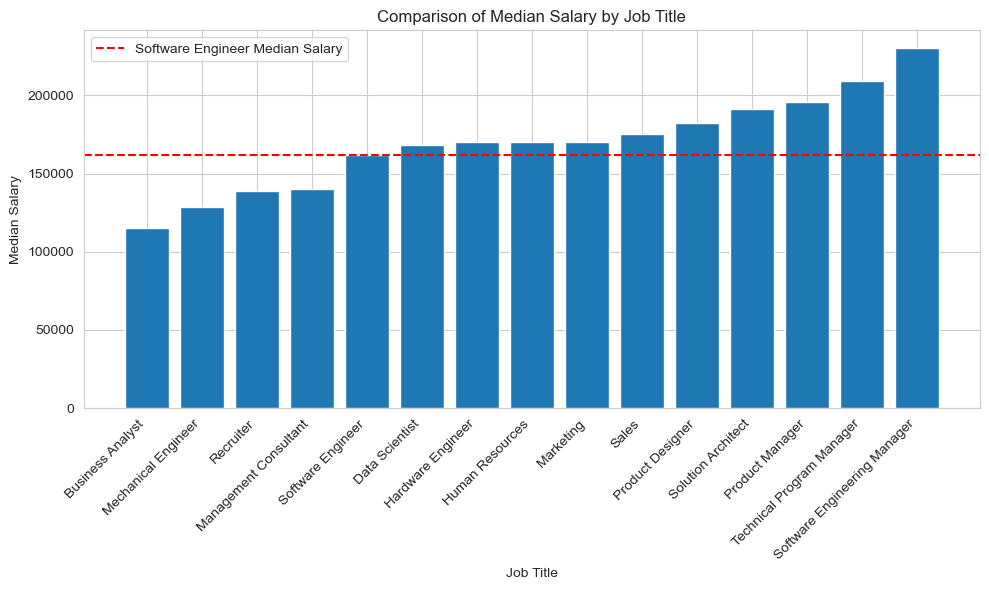

In [ ]:

software_engineer_salary_median = se['totalyearlycompensation'].median()

median_salaries = tech.groupby('title')['totalyearlycompensation'].median().sort_values()


plt.figure(figsize=(10, 6))
plt.bar(median_salaries.index, median_salaries.values)
plt.axhline(software_engineer_salary_median, color='r', linestyle='--', label='Software Engineer Median Salary')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Median Salary')
plt.title('Comparison of Median Salary by Job Title')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

se.columns

se['country'].unique()

array(['USA', 'Canada', 'India', 'Netherlands', 'United Kingdom',
       'Ireland', 'Germany', 'Russia', 'China', 'Israel', 'Singapore',
       'Czech Republic', 'Japan', 'Switzerland', 'Poland', 'Australia',
       'Spain', 'Italy', 'Romania', 'South Africa', 'France', 'Serbia',
       'Ukraine', 'Hungary', 'Portugal', 'Brazil', 'Taiwan', 'Sweden',
       'New Zealand', 'Argentina', 'Peru', 'Philippines', 'Norway',
       'Estonia', 'Belarus', 'Austria', 'South', 'Finland',
       'Hong Kong (SAR)', 'Mexico', 'Indonesia', 'Costa Rica', 'Slovakia',
       'Denmark', 'Belgium', 'Luxembourg', 'Malaysia', 'Colombia',
       'Kenya', 'United Arab Emirates', 'Bulgaria', 'Lithuania',
       'Thailand', 'Chile', 'Ghana', 'Kazakhstan', 'Uzbekistan',
       'Armenia'], dtype=object)

In [ ]:
se.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Race', 'Education', 'city', 'state', 'country'],
      dtype='object')

# Country

In [ ]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

top_countries = se['country'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to keep only rows from these top ten countries
filtered_se = se[se['country'].isin(top_countries)]

# Now follow your existing procedure with the filtered DataFrame
y_country = filtered_se['totalyearlycompensation']
encoder_country = OneHotEncoder(sparse=False, drop='first')
encoded_country = encoder_country.fit_transform(filtered_se[['country', 'Race', 'Education', 'gender']])
encoded_country_df = pd.DataFrame(encoded_country, columns=encoder_country.get_feature_names_out(['country', 'Race', 'Education', 'gender']))
encoded_country_df.index = filtered_se.index

X_country = pd.concat([filtered_se[['yearsofexperience', 'yearsatcompany']], encoded_country_df], axis=1)
X_country = sm.add_constant(X_country)

X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_country, y_country, test_size=0.2, random_state=42)

model_country = sm.OLS(y_train_country, X_train_country).fit()
print(model_country.summary())

y_pred_country = model_country.predict(X_test_country)
mse_country = mean_squared_error(y_test_country, y_pred_country)
print(f'Mean Squared Error for Country (statsmodels): {mse_country}')



                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.442
Model:                                 OLS   Adj. R-squared:                  0.441
Method:                      Least Squares   F-statistic:                     375.5
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:37:44   Log-Likelihood:            -1.2440e+05
No. Observations:                     9988   AIC:                         2.489e+05
Df Residuals:                         9966   BIC:                         2.490e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# State

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Step 1: Identify the top ten states by count
top_states = se['state'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to only include rows from the top ten states
filtered_se_state = se[se['state'].isin(top_states)]

# Follow the existing procedure with the filtered DataFrame for states
y_state = filtered_se_state['totalyearlycompensation']
encoder_state = OneHotEncoder(sparse=False, drop='first')
encoded_state = encoder_state.fit_transform(filtered_se_state[['state', 'Race', 'Education', 'gender']])
encoded_state_df = pd.DataFrame(encoded_state, columns=encoder_state.get_feature_names_out(['state', 'Race', 'Education', 'gender']))
encoded_state_df.index = filtered_se_state.index

X_state = pd.concat([filtered_se_state[['yearsofexperience', 'yearsatcompany']], encoded_state_df], axis=1)
X_state = sm.add_constant(X_state)

X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(X_state, y_state, test_size=0.2, random_state=42)

model_state = sm.OLS(y_train_state, X_train_state).fit()
print(model_state.summary())

y_pred_state = model_state.predict(X_test_state)
mse_state = mean_squared_error(y_test_state, y_pred_state)
print(f'Mean Squared Error for State (statsmodels): {mse_state}')


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.482
Model:                                 OLS   Adj. R-squared:                  0.480
Method:                      Least Squares   F-statistic:                     333.7
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:41:07   Log-Likelihood:                -93709.
No. Observations:                     7564   AIC:                         1.875e+05
Df Residuals:                         7542   BIC:                         1.876e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# City

In [ ]:
# Step 1: Identify the top ten cities by count
top_cities = se['city'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to only include rows from the top ten cities
filtered_se_city = se[se['city'].isin(top_cities)]

# Follow the existing procedure with the filtered DataFrame for cities
y_city = filtered_se_city['totalyearlycompensation']
encoder_city = OneHotEncoder(sparse=False, drop='first')
encoded_city = encoder_city.fit_transform(filtered_se_city[['city', 'Race', 'Education', 'gender']])
encoded_city_df = pd.DataFrame(encoded_city, columns=encoder_city.get_feature_names_out(['city', 'Race', 'Education', 'gender']))
encoded_city_df.index = filtered_se_city.index

X_city = pd.concat([filtered_se_city[['yearsofexperience', 'yearsatcompany']], encoded_city_df], axis=1)
X_city = sm.add_constant(X_city)

X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

model_city = sm.OLS(y_train_city, X_train_city).fit()
print(model_city.summary())

y_pred_city = model_city.predict(X_test_city)
mse_city = mean_squared_error(y_test_city, y_pred_city)
print(f'Mean Squared Error for City (statsmodels): {mse_city}')


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.515
Model:                                 OLS   Adj. R-squared:                  0.513
Method:                      Least Squares   F-statistic:                     240.9
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:41:32   Log-Likelihood:                -59074.
No. Observations:                     4785   AIC:                         1.182e+05
Df Residuals:                         4763   BIC:                         1.183e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Assuming 'se' is your DataFrame and it's already been loaded.
# se = pd.read_csv('your_data.csv')

# Filter the data to include only the rows with the top locations and encode the categorical variables
top_locations = se['country'].value_counts().nlargest(5).index.union(
    se['state'].value_counts().nlargest(5).index).union(
    se['city'].value_counts().nlargest(5).index)

location_data = se[se['country'].isin(top_locations) | se['state'].isin(top_locations) | se['city'].isin(top_locations)]
y_location = location_data['totalyearlycompensation']

# One-hot encode the categorical columns
categorical_columns = ['country', 'state', 'city', 'Race', 'Education', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')  # drop first to avoid dummy variable trap
encoded_data = encoder.fit_transform(location_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Ensure indices match for concatenation
encoded_df.index = location_data.index

# Concatenate the non-categorical and categorical (encoded) data
X_location = pd.concat([
    location_data[['yearsofexperience', 'yearsatcompany']],
    encoded_df
], axis=1)
X_location = sm.add_constant(X_location)  # Add a constant to the model (the intercept)

# Split the data into training and test sets
X_train_location, X_test_location, y_train_location, y_test_location = train_test_split(
    X_location, y_location, test_size=0.2, random_state=42)

# Fit the OLS model
model_location = sm.OLS(y_train_location, X_train_location).fit()

# Output the summary of the model
model_summary_location = model_location.summary()
print(model_summary_location)

# Make predictions on the test set
y_pred_location = model_location.predict(X_test_location)

# Calculate and output the Mean Squared Error for the test set
mse_location = mean_squared_error(y_test_location, y_pred_location)
print(f'Mean Squared Error for Location (statsmodels): {mse_location}')


/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.625
Model:                                 OLS   Adj. R-squared:                  0.607
Method:                      Least Squares   F-statistic:                     33.96
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:25:41   Log-Likelihood:            -1.1768e+05
No. Observations:                     9608   AIC:                         2.363e+05
Df Residuals:                         9157   BIC:                         2.395e+05
Df Model:                              450                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Assuming 'se' is your DataFrame and it's already been loaded.
# se = pd.read_csv('your_data.csv')

def run_ols_model(data, predictors, target):
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_data = encoder.fit_transform(data[predictors])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(predictors))

    encoded_df.index = data.index
    X = pd.concat([data[['yearsofexperience', 'yearsatcompany']], encoded_df], axis=1)
    X = sm.add_constant(X)  # Add a constant to the model (the intercept)

    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    return model, X_test, y_test, y_pred

# Run model for 'state'
state_model, X_test_state, y_test_state, y_pred_state = run_ols_model(
    se, ['state', 'Race', 'Education', 'gender'], 'totalyearlycompensation')

# Run model for 'city'
city_model, X_test_city, y_test_city, y_pred_city = run_ols_model(
    se, ['city', 'Race', 'Education', 'gender'], 'totalyearlycompensation')

# Run model for 'country'
country_model, X_test_country, y_test_country, y_pred_country = run_ols_model(
    se, ['country', 'Race', 'Education', 'gender'], 'totalyearlycompensation')


/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.568
Model:                                 OLS   Adj. R-squared:                  0.561
Method:                      Least Squares   F-statistic:                     85.08
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:29:43   Log-Likelihood:            -1.2803e+05
No. Observations:                    10388   AIC:                         2.564e+05
Df Residuals:                        10229   BIC:                         2.575e+05
Df Model:                              158                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.637
Model:                                 OLS   Adj. R-squared:                  0.618
Method:                      Least Squares   F-statistic:                     32.11
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:29:44   Log-Likelihood:            -1.2712e+05
No. Observations:                    10388   AIC:                         2.553e+05
Df Residuals:                         9848   BIC:                         2.592e+05
Df Model:                              539                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Step 1: Identify the top ten locations in country, state, and city separately
top_countries = se['country'].value_counts().nlargest(10).index
top_states = se['state'].value_counts().nlargest(10).index
top_cities = se['city'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to keep only rows from these top categories
filtered_data = se[se['country'].isin(top_countries) | se['state'].isin(top_states) | se['city'].isin(top_cities)]
y_filtered = filtered_data['totalyearlycompensation']

# One-hot encode the categorical columns
categorical_columns = ['country', 'state', 'city', 'Race', 'Education', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid dummy variable trap
encoded = encoder.fit_transform(filtered_data[categorical_columns])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df.index = filtered_data.index

# Concatenate the non-categorical and categorical (encoded) data
X_filtered = pd.concat([filtered_data[['yearsofexperience', 'yearsatcompany']], encoded_df], axis=1)
X_filtered = sm.add_constant(X_filtered)  # Add a constant to the model (the intercept)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error for the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Location (statsmodels): {mse}')


/Users/Jonat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.629
Model:                                 OLS   Adj. R-squared:                  0.610
Method:                      Least Squares   F-statistic:                     33.14
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:43:41   Log-Likelihood:            -1.2255e+05
No. Observations:                    10004   AIC:                         2.461e+05
Df Residuals:                         9516   BIC:                         2.496e+05
Df Model:                              487                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Function to reduce categories by merging smaller ones into an 'Other' category
def reduce_categories(series, num_to_keep=10):
    counts = series.value_counts()
    others = counts.iloc[num_to_keep:].index
    reduced_series = series.apply(lambda x: x if x in counts.iloc[:num_to_keep].index else 'Other')
    return reduced_series

# Assuming 'se' is your DataFrame and it's already been loaded.
# se = pd.read_csv('your_data.csv')

# Reduce the number of categories for country, state, and city
se['country'] = reduce_categories(se['country'], 10)
se['state'] = reduce_categories(se['state'], 10)
se['city'] = reduce_categories(se['city'], 10)

# One-hot encode the categorical columns
categorical_columns = ['country', 'state', 'city', 'Race', 'Education', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')  # Avoid the dummy variable trap
encoded = encoder.fit_transform(se[categorical_columns])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df.index = se.index

# Prepare the data for the model
y = se['totalyearlycompensation']
X = pd.concat([se[['yearsofexperience', 'yearsatcompany']], encoded_df], axis=1)
X = sm.add_constant(X)  # Adding a constant to the model (intercept)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Output the summary of the model
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error for the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Location (statsmodels): {mse}')


/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_21746/3019382575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se['country'] = reduce_categories(se['country'], 10)
/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_21746/3019382575.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se['state'] = reduce_categories(se['state'], 10)
/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_21746/3019382575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.553
Model:                                 OLS   Adj. R-squared:                  0.551
Method:                      Least Squares   F-statistic:                     399.7
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:48:17   Log-Likelihood:            -1.2821e+05
No. Observations:                    10388   AIC:                         2.565e+05
Df Residuals:                        10355   BIC:                         2.567e+05
Df Model:                               32                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------